# PCA的简单实现

In [1]:
import matplotlib.pyplot as plt
import numpy as np

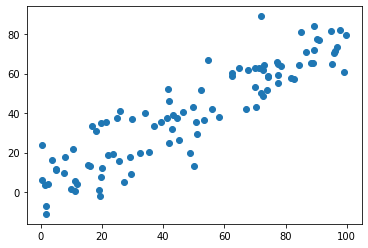

In [2]:
X = np.empty(shape = (100, 2)) 
np.random.seed(666)
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

## step1 - demean

In [3]:
# 操作含义：将数据中每一个值减去相应特征的平均值
def demean(X):
    return X - np.mean(X, axis = 0)

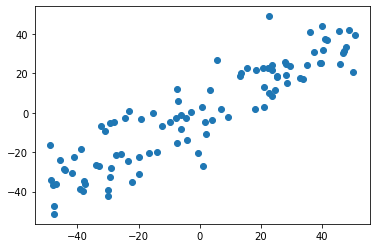

In [4]:
x_demean = demean(X)
plt.scatter(x_demean[:, 0], x_demean[:, 1])
plt.show()

## 梯度上升法求解

In [5]:
# 目标函数
def f(x, w):
    return np.sum(x.dot(w) ** 2) / len(x)

In [6]:
# 梯度函数
def delta_f(x, w):
    return x.T.dot(x.dot(w)) * 2. / len(x)

In [7]:
# 处理w，使其模为1
def deal_w(w):
    return w / np.linalg.norm(w)

In [8]:
# 梯度上升法
def gradient_ascent(x, w, iter_times, learn_rate):
    w = deal_w(w)
    loss_his = []
    while iter_times:
        gradient = delta_f(x, w)
        w += learn_rate * gradient
        w = deal_w(w)  # 注意一：将w转化为单位向量，简化计算
        print(w)
        loss_his.append(f(x, w))
        iter_times -= 1
    return w, loss_his

In [9]:
w_init = np.array([1,1])  #注意二：不能使用0向量作为初始向量
iter_times = 100
learn_rate = 0.0001
w_final, loss_his = gradient_ascent(x_demean, w_init, iter_times, learn_rate)

[0.72286105 0.69099342]
[0.73496463 0.67810545]
[0.74428798 0.66785882]
[0.75148785 0.65974693]
[0.75706043 0.65334486]
[0.7613819  0.64830363]
[0.76473863 0.64434062]
[0.76734947 0.64122912]
[0.7693824  0.63878848]
[0.77096673 0.63687542]
[0.77220231 0.63537673]
[0.77316646 0.63420314]
[0.77391914 0.63328443]
[0.77450693 0.63256542]
[0.77496609 0.63200282]
[0.77532483 0.63156267]
[0.77560518 0.63121835]
[0.77582429 0.63094902]
[0.77599555 0.63073838]
[0.77612943 0.63057363]
[0.77623409 0.63044479]
[0.77631592 0.63034403]
[0.77637989 0.63026523]
[0.77642991 0.63020362]
[0.77646901 0.63015543]
[0.77649959 0.63011775]
[0.7765235  0.63008829]
[0.77654219 0.63006525]
[0.77655681 0.63004724]
[0.77656824 0.63003315]
[0.77657718 0.63002213]
[0.77658417 0.63001352]
[0.77658963 0.63000678]
[0.7765939  0.63000152]
[0.77659724 0.6299974 ]
[0.77659986 0.62999418]
[0.7766019  0.62999166]
[0.7766035  0.62998969]
[0.77660474 0.62998815]
[0.77660572 0.62998695]
[0.77660649 0.62998601]
[0.77660708 0.62

[0.77660922 0.62998263]


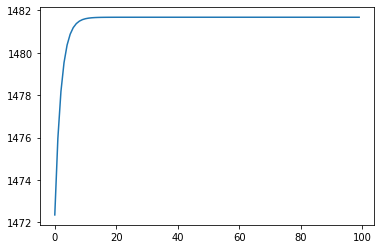

0.8111964305956482

In [10]:
print(w_final)
plt.plot(loss_his)
plt.show()
k = w_final[1] / w_final[0]
k

In [11]:
# 注意三：不能使用StandardScaler进行数据归一化处理

# 总结：

* 1、将w转化为单位向量，简化计算
* 2、不能使用0向量作为初始向量
* 3、不能使用StandardScaler进行数据归一化处理
* 4、PCA的目标在于，找一个向量轴，使特征在其上投影的方差之和最大